In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
import xarray
import scipy as sp

In [2]:
sys.path.insert(1, os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir))
import neurotorch as neuro
neuro.Start_Background()
%matplotlib inline

Running threads: MainThreadIOPubHeartbeatControlIPythonHistorySavingThreadThread-3Thread-5 (Start)Thread-60
Closing
Exit Neurotorch


In [ ]:
from neurotorch.gui.components import Job, JobState, Statusbar

In [3]:
job = Job(10)
neuro.API.GUI().statusbar._jobs.append(job)

In [17]:
job2 = Job(5)
neuro.API.GUI().statusbar._jobs.append(job2)

In [6]:
job3 = Job(0)
neuro.API.GUI().statusbar._jobs.append(job3)

In [15]:
job2.SetProgress(5,"Starting ImageJ")

In [4]:
job.SetStopped()

In [36]:
job2.SetProgress(4, "Calculating Diff")

In [ ]:
print(neuro.API.GUI().statusbar._jobs)

In [18]:
neuro.API.GUI().statusbar._jobs[1].SetStopped("Stopped")

In [32]:
neuro.API.GUI().statusbar._jobs[0].steps = 10
neuro.API.GUI().statusbar._jobs[0].showSteps = True

In [34]:
neuro.API.GUI().statusbar._jobs[0].SetStopped()

In [1]:
class TestClass:
    def __init__(self):
        self._prop = "Hello World"

    @property
    def Prop(self):
        print("Abruf")
        return self._prop

In [2]:
tc = TestClass()

In [ ]:
print(c)

### Test of new Image Object

In [10]:
imgObj = neuro.Get_API().ImageObject

In [16]:
print("Min", np.min(imgObj.img), imgObj.imgProps.min)
print("Max", np.max(imgObj.img), imgObj.imgProps.max)
print("Mean", np.mean(imgObj.img), imgObj.imgProps.mean)
print("Median", np.median(imgObj.img), imgObj.imgProps.median)
print("Std", np.std(imgObj.img), imgObj.imgProps.std)

Min 0 0
Max 195 195
Mean 7.8555351257324215 7.8555351257324215
Median 5.0 5.0
Std 10.796017422620801 10.796017422620801


In [31]:
def Test(name, img, imgProps, refImage):
    print(name, img.shape, refImage.shape)
    equal = (img == refImage).all()
    print("Images equal", equal)
    min1, min2 = (np.min(img), imgProps.min)
    max1, max2 = (np.max(img), imgProps.max)
    mean1, mean2 = (np.mean(img), imgProps.mean)
    median1, median2 = (np.median(img), imgProps.median)
    std1, std2 = (np.std(img), imgProps.std)
    print("Min", min1, min2)
    print("Max", max1, max2)
    print("Mean", mean1, mean2)
    print("Median", median1, median2)
    print("Std", std1, std2)
    if min1 == min2 and max1 == max2 and mean1 == mean2 and median1 == median2 and std1 == std2 and equal:
        print("Passed: True")
    else:
        print("Passed: False")
    print("--------------------------")

Test("Image", imgObj.img, imgObj.imgProps, imgObj.img)
Test("Image Spatial", imgObj.imgSpatial.maxArray, imgObj.imgSpatial.max, np.max(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.minArray, imgObj.imgSpatial.min, np.min(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.meanArray, imgObj.imgSpatial.mean, np.mean(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.medianArray, imgObj.imgSpatial.median, np.median(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.stdArray, imgObj.imgSpatial.std, np.std(imgObj.img, axis=0))

Image (20, 512, 512) (20, 512, 512)
Images equal True
Min 0 0
Max 195 195
Mean 7.8555351257324215 7.8555351257324215
Median 5.0 5.0
Std 10.796017422620801 10.796017422620801
Passed: True
--------------------------
Image Spatial (512, 512) (512, 512)
Images equal True
Min 0 0
Max 195 195
Mean 8.884601593017578 8.884601593017578
Median 6.0 6.0
Std 12.36363423956587 12.36363423956587
Passed: True
--------------------------
Image Spatial (512, 512) (512, 512)
Images equal True
Min 0 0
Max 160 160
Mean 7.367092132568359 7.367092132568359
Median 5.0 5.0
Std 10.32102685125854 10.32102685125854
Passed: True
--------------------------
Image Spatial (512, 512) (512, 512)
Images equal True
Min 0.0 0.0
Max 161.5 161.5
Mean 7.855535125732421 7.855535125732421
Median 5.35 5.35
Std 10.75677793201929 10.75677793201929
Passed: True
--------------------------
Image Spatial (512, 512) (512, 512)
Images equal True
Min 0.0 0.0
Max 161.5 161.5
Mean 7.764429092407227 7.764429092407227
Median 5.0 5.0
Std 10.5

In [34]:
Test("Image Temporal", imgObj.imgTemporal.maxArray, imgObj.imgTemporal.max, np.max(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.minArray, imgObj.imgTemporal.min, np.min(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.meanArray, imgObj.imgTemporal.mean, np.mean(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.medianArray, imgObj.imgTemporal.median, np.median(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.stdArray, imgObj.imgTemporal.std, np.std(imgObj.img, axis=(1,2)))

Image Temporal (20,) (20,)
Images equal True
Min 160 160
Max 195 195
Mean 167.9 167.9
Median 163.0 163.0
Std 10.108906963663284 10.108906963663284
Passed: True
--------------------------
Image Temporal (20,) (20,)
Images equal True
Min 0 0
Max 0 0
Mean 0.0 0.0
Median 0.0 0.0
Std 0.0 0.0
Passed: True
--------------------------
Image Temporal (20,) (20,)
Images equal True
Min 7.777679443359375 7.777679443359375
Max 8.026084899902344 8.026084899902344
Mean 7.8555351257324215 7.8555351257324215
Median 7.842996597290039 7.842996597290039
Std 0.07026021387138275 0.07026021387138275
Passed: True
--------------------------
Image Temporal (20,) (20,)
Images equal True
Min 5.0 5.0
Max 6.0 6.0
Mean 5.05 5.05
Median 5.0 5.0
Std 0.21794494717703367 0.21794494717703367
Passed: True
--------------------------
Image Temporal (20,) (20,)
Images equal True
Min 10.455266951689122 10.455266951689122
Max 11.823470517409174 11.823470517409174
Mean 10.789001325370378 10.789001325370378
Median 10.603710717604

In [35]:
Test("diffImg", imgObj.imgDiff, imgObj.imgDiffProps, np.diff(imgObj.img, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.maxArray, imgObj.imgDiffSpatial.max, np.max(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.minArray, imgObj.imgDiffSpatial.min, np.min(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.meanArray, imgObj.imgDiffSpatial.mean, np.mean(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.medianArray, imgObj.imgDiffSpatial.median, np.median(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.stdArray, imgObj.imgDiffSpatial.std, np.std(imgObj.imgDiff, axis=0))

diffImg (19, 512, 512) (19, 512, 512)
Images equal True
Min -76 -76
Max 75 75
Mean 0.003974312230160362 0.003974312230160362
Median 0.0 0.0
Std 1.5136341602162553 1.5136341602162553
Passed: True
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal True
Min 0 0
Max 75 75
Mean 1.3360137939453125 1.3360137939453125
Median 1.0 1.0
Std 2.6856900252856994 2.6856900252856994
Passed: True
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal True
Min -76 -76
Max 0 0
Mean -1.3307762145996094 -1.3307762145996094
Median -1.0 -1.0
Std 2.757688741894834 2.757688741894834
Passed: True
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal True
Min -0.3684210526315789 -0.3684210526315789
Max 0.5789473684210527 0.5789473684210527
Mean 0.003974312230160362 0.003974312230160362
Median 0.0 0.0
Std 0.036500595818435955 0.036500595818435955
Passed: True
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal True


In [36]:
Test("diffImg Temporal", imgObj.imgDiffTemporal.maxArray, imgObj.imgDiffTemporal.max, np.max(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.minArray, imgObj.imgDiffTemporal.min, np.min(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.meanArray, imgObj.imgDiffTemporal.mean, np.mean(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.medianArray, imgObj.imgDiffTemporal.median, np.median(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.stdArray, imgObj.imgDiffTemporal.std, np.std(imgObj.imgDiff, axis=(1,2)))

diffImg Temporal (19,) (19,)
Images equal True
Min 4 4
Max 75 75
Mean 34.1578947368421 34.1578947368421
Median 13.0 13.0
Std 28.72237924079545 28.72237924079545
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min -76 -76
Max -5 -5
Mean -33.63157894736842 -33.63157894736842
Median -12.0 -12.0
Std 28.28838431195054 28.28838431195054
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min -0.233245849609375 -0.233245849609375
Max 0.21108627319335938 0.21108627319335938
Mean 0.003974312230160362 0.003974312230160362
Median 0.05498504638671875 0.05498504638671875
Std 0.12964499771340468 0.12964499771340468
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min 0.0 0.0
Max 0.0 0.0
Mean 0.0 0.0
Median 0.0 0.0
Std 0.0 0.0
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min 0.7123779340654661 0.7123779340654661
Max 2.3761870104436094 2.376187010443

In [46]:
imgObj.imgDiff_Mode = "Convoluted"

In [47]:
Test("diffImg", imgObj.imgDiff, imgObj.imgDiffProps, np.diff(imgObj.img, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.maxArray, imgObj.imgDiffSpatial.max, np.max(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.minArray, imgObj.imgDiffSpatial.min, np.min(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.meanArray, imgObj.imgDiffSpatial.mean, np.mean(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.medianArray, imgObj.imgDiffSpatial.median, np.median(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.stdArray, imgObj.imgDiffSpatial.std, np.std(imgObj.imgDiff, axis=0))

diffImg (19, 512, 512) (19, 512, 512)
Images equal False
Min -61 -61
Max 61 61
Mean 0.0008930407072368421 0.0008930407072368421
Median 0.0 0.0
Std 1.1849254503678972 1.1849254503678972
Passed: False
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal True
Min 0 0
Max 61 61
Mean 0.3010444641113281 0.3010444641113281
Median 0.0 0.0
Std 2.3483706682134295 2.3483706682134295
Passed: True
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal True
Min -61 -61
Max 0 0
Mean -0.3037910461425781 -0.3037910461425781
Median 0.0 0.0
Std 2.428927477701627 2.428927477701627
Passed: True
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal True
Min -0.2631578947368421 -0.2631578947368421
Max 0.47368421052631576 0.47368421052631576
Mean 0.0008930407072368421 0.0008930407072368421
Median 0.0 0.0
Std 0.01854679169359821 0.01854679169359821
Passed: True
--------------------------
diffImg Spatial (512, 512) (512, 512)
Images equal T

In [48]:
Test("diffImg Temporal", imgObj.imgDiffTemporal.maxArray, imgObj.imgDiffTemporal.max, np.max(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.minArray, imgObj.imgDiffTemporal.min, np.min(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.meanArray, imgObj.imgDiffTemporal.mean, np.mean(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.medianArray, imgObj.imgDiffTemporal.median, np.median(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.stdArray, imgObj.imgDiffTemporal.std, np.std(imgObj.imgDiff, axis=(1,2)))

diffImg Temporal (19,) (19,)
Images equal True
Min 1 1
Max 61 61
Mean 24.05263157894737 24.05263157894737
Median 8.0 8.0
Std 23.091291783542278 23.091291783542278
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min -61 -61
Max -1 -1
Mean -23.57894736842105 -23.57894736842105
Median -5.0 -5.0
Std 22.91015814568699 22.91015814568699
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min -0.1880950927734375 -0.1880950927734375
Max 0.16592788696289062 0.16592788696289062
Mean 0.0008930407072368421 0.0008930407072368421
Median 0.01525115966796875 0.01525115966796875
Std 0.0910896607851728 0.0910896607851728
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min 0.0 0.0
Max 0.0 0.0
Mean 0.0 0.0
Median 0.0 0.0
Std 0.0 0.0
Passed: True
--------------------------
diffImg Temporal (19,) (19,)
Images equal True
Min 0.2191770547479842 0.2191770547479842
Max 2.027721363373381 2.02772136337

In [3]:
imgObj = neuro.Get_API().ImageObject

C:\Users\abril\AppData\Local\Temp\ipykernel_33884\3069084883.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


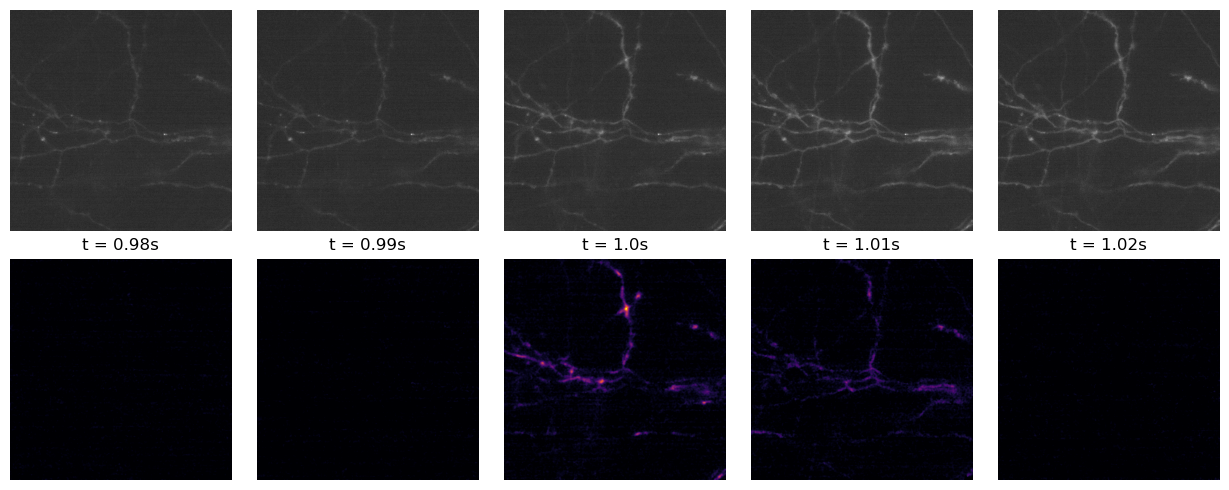

In [24]:
l = 98
r = 103
fig, axes = plt.subplots(2, r-l, figsize=((r-l)*2.5, 5))
for ax in axes.flatten():
    ax.set_axis_off()
vmin = np.min(imgObj.img[l:r+1])
vmax = np.max(imgObj.img[l:r+1])
vmax2 = np.max(imgObj.imgDiff[l-1:r])
for i in range(axes.shape[1]):
    axes[0, i].imshow(imgObj.img[l+i], cmap="Greys_r", vmin=vmin, vmax=vmax)
    axes[1, i].imshow(imgObj.imgDiff[l+i-1], cmap="inferno", vmin=0, vmax=vmax2)
    axes[1, i].set_title(f"t = {0.01*(i+l)}s")
fig.tight_layout()
fig.show()